In [1]:
import pydotplus 
import pandas as pd

from IPython.display import Image
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Считывание данных

In [2]:
data = pd.read_csv('german_credit.csv')

In [3]:
with open('german.doc') as f:
    documentation = f.read()
    print(documentation)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

Выделим описание признаков:

In [4]:
b = "7.  Attribute description for german"
e = "8.  Cost Matrix"
features = documentation[documentation.find(b) + len(b):documentation.find(e)].split('Attribute')

Если не заменить "&" у меня ошибка вылетает:

In [5]:
data = data.rename(columns={"Sex & Marital Status": "Sex and Marital Status"})

#### Зависимость accuracy от максимальной глубины дерева

In [8]:
from sklearn import model_selection

In [19]:
a = model_selection.KFold(n_splits=5)

In [29]:
def shuffle(df, n=1, axis=0):     
    df = df.copy()
    for _ in range(n):
        df.apply(np.random.shuffle, axis=axis)
    return df

In [72]:
data_sh = data.reindex(np.random.permutation(data.index))

In [73]:
depth_array = np.arange(1, 20)
score_array = np.array([cross_val_score(tree.DecisionTreeClassifier(max_depth=k),
                                        data_sh.iloc[:, 1:], y=data_sh.Creditability,
                                        cv=model_selection.KFold(n_splits=5)).mean() for k in depth_array])

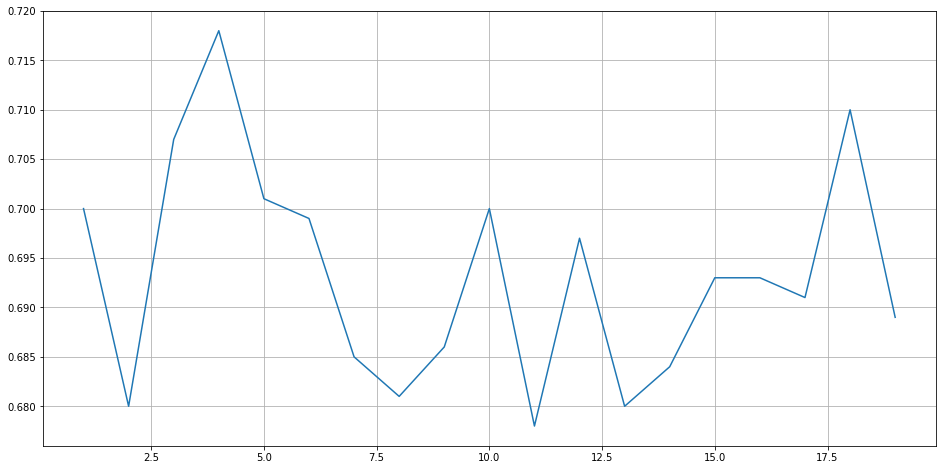

In [74]:
plt.figure(figsize=(16,8))
plt.plot(depth_array, score_array)
plt.grid()

Наилучший score достигается при максимальной глубине дерева:

In [75]:
depth_array[np.argmax(score_array)]

4

#### Визуализация дерева глубины 3

In [52]:
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(data.iloc[:, 1:], data.Creditability)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [53]:
dot_data = tree.export_graphviz(model, out_file="tree.out", 
                         feature_names=map(lambda x: str(x[0]) + '. ' + x[1],
                                           zip (np.arange(1, 21), data.columns[1:])),  
                         class_names=['0', '1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

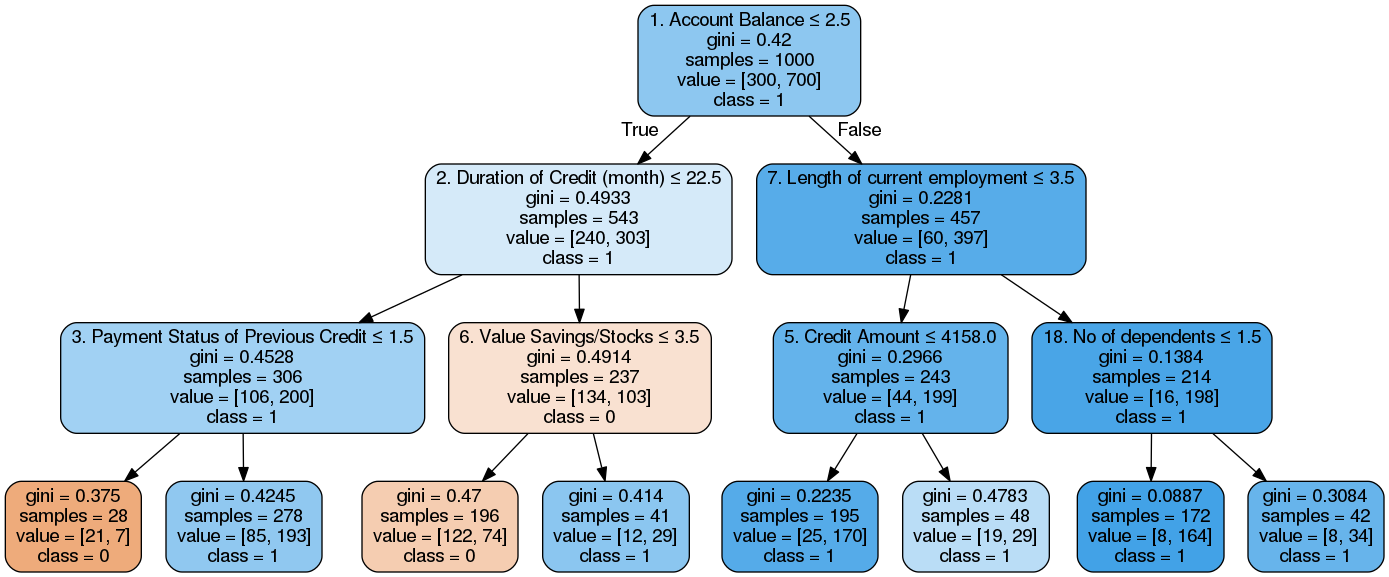

In [54]:
graph = pydotplus.graphviz.graph_from_dot_file("tree.out")  
Image(graph.create_png()) 

#### Анализ дерева:

Дерево классифицирует 0, если

In [63]:
print (features[1])

 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account




На счету в банке мало денег и если длительность кредита не очень большая, при

In [65]:
print (features[3])

 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)




In [ ]:
2